In [5]:

import collections
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Creating the dictionary from the most frequent grades entered as list.
def f(l):
    d=dict() 
    for i in l: 
        d[i[0]] = i[1] 
    return d 

In [7]:
#Calculating Average Grade for a particular CCC or UWE
def avgGrade(d):
    listOfGrades = ["A","A-","B","B-","C","C-","D"]
    gradesVal = range(10,3,-1)
    MappedGrades = dict()
    for i in range(len(listOfGrades)):
        MappedGrades[listOfGrades[i]] = gradesVal[i]
    MappedGrades["F"]=0
    MappedGrades["W"] = 6
    MappedGrades["AP"] = 10
    
    s=0
    for key,val in d.items():
        s+= MappedGrades[key]*val
    return s/sum(d.values())

<ipython-input-9-57de1f67760b>:140: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5, 3))


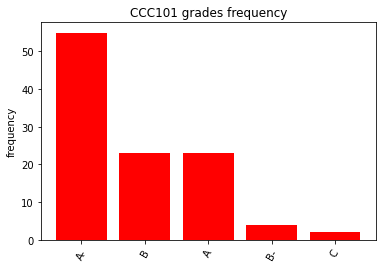

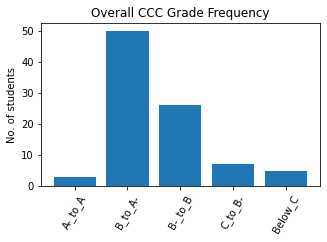

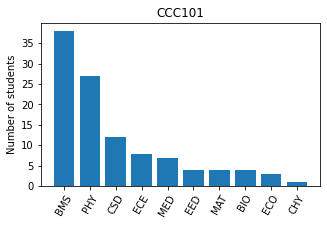

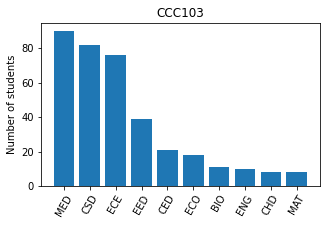

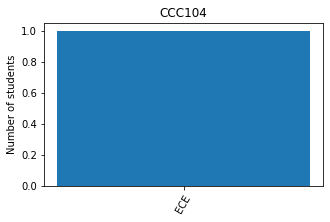

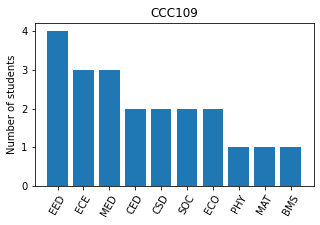

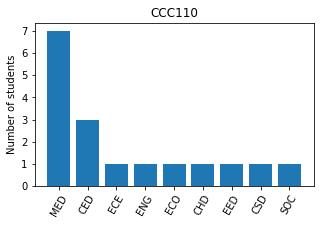

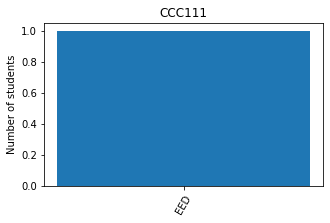

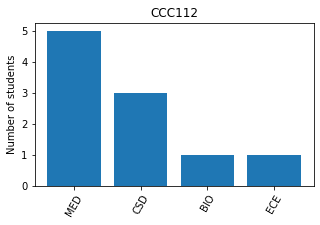

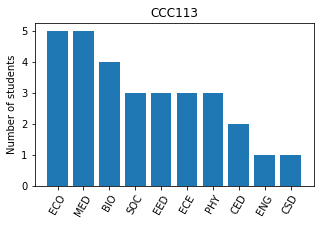

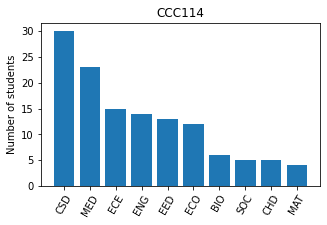

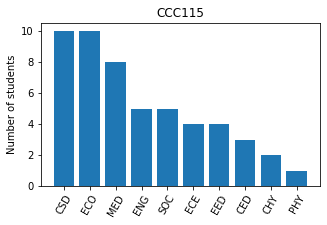

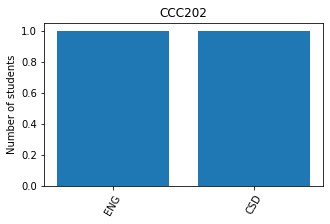

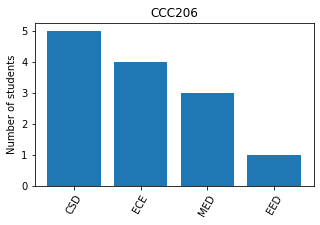

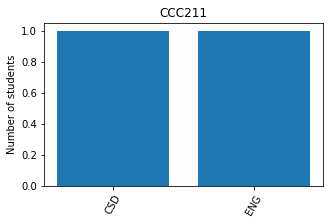

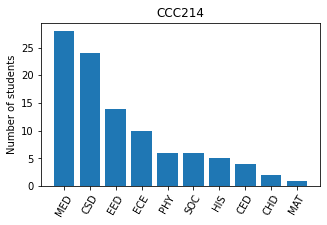

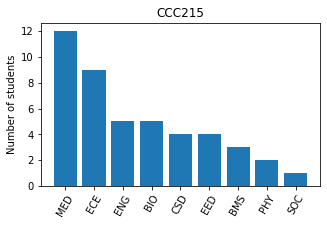

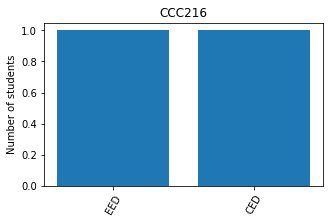

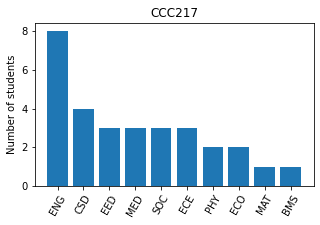

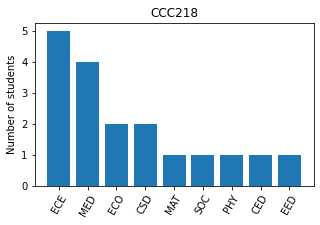

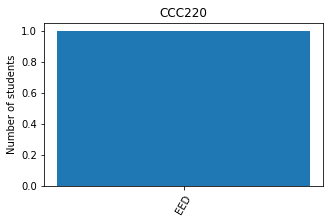

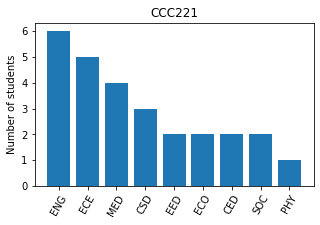

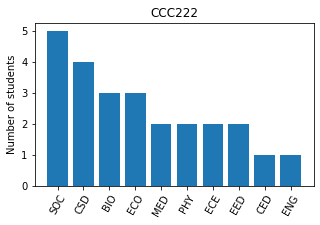

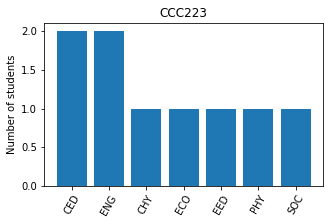

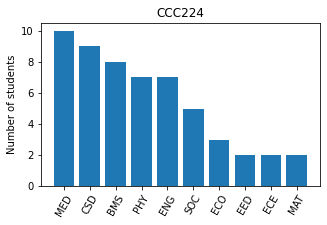

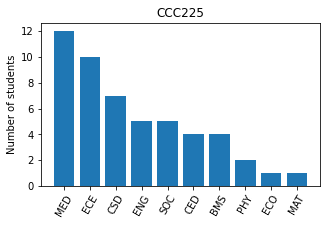

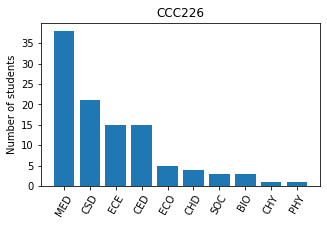

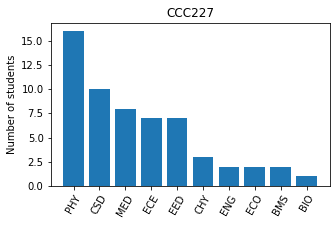

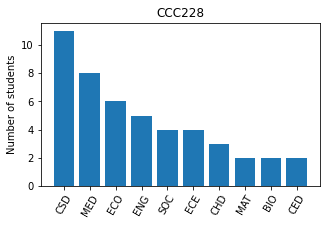

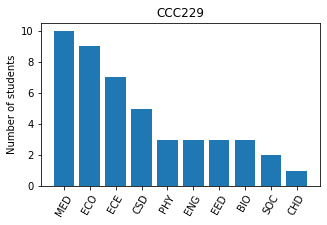

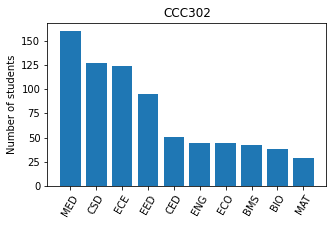

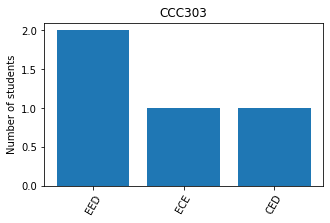

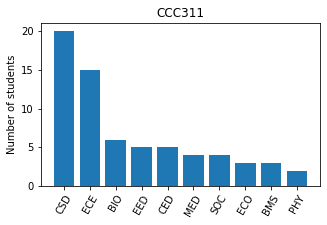

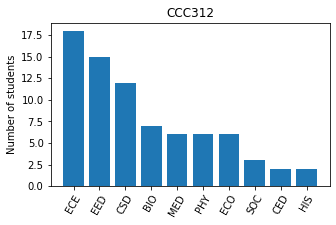

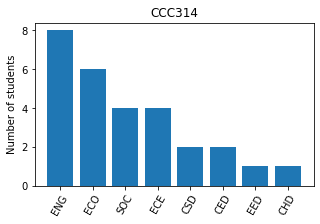

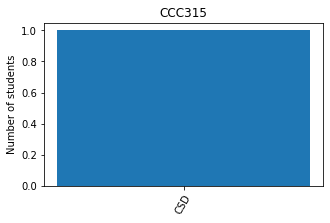

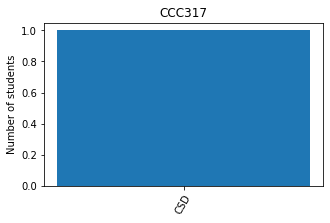

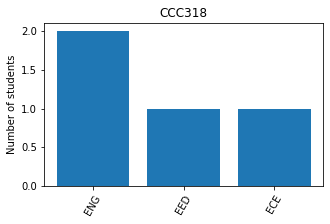

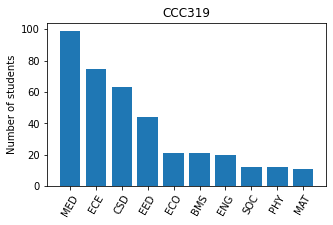

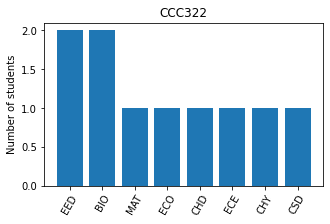

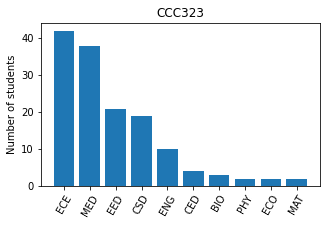

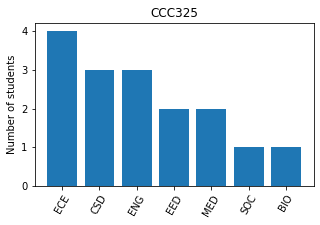

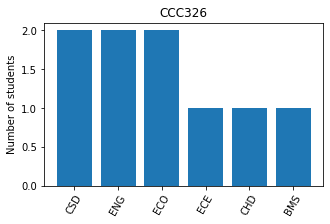

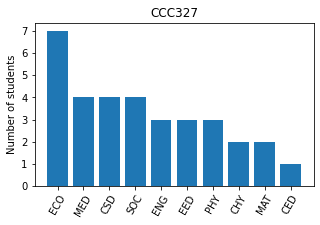

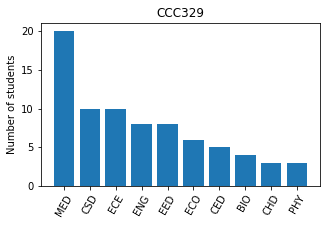

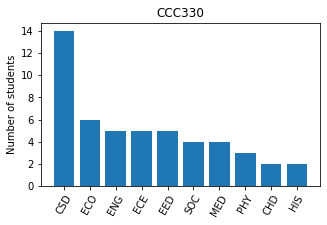

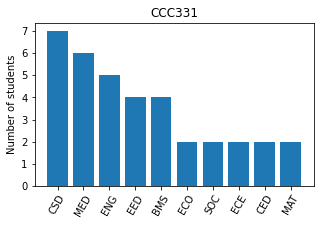

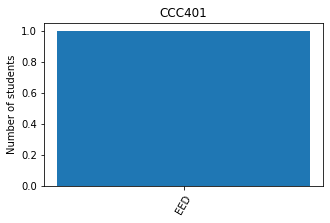

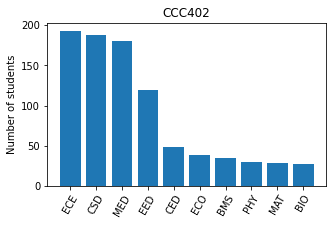

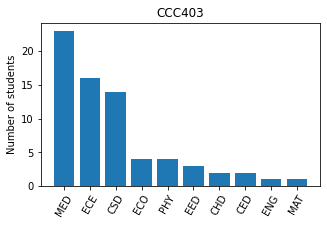

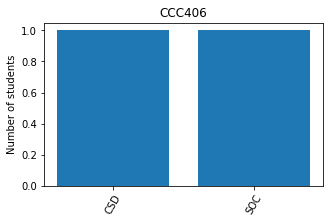

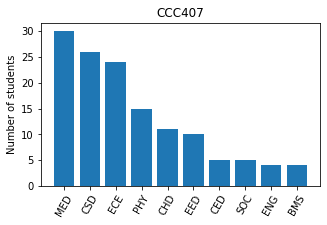

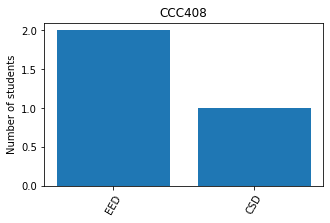

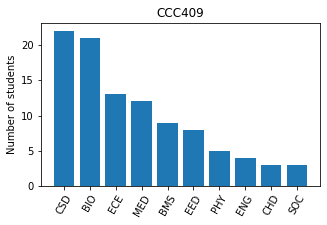

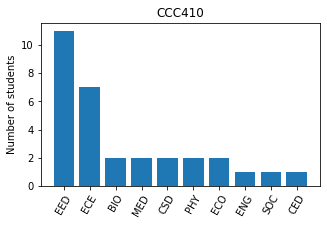

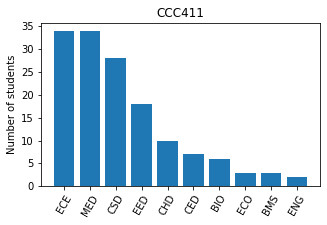

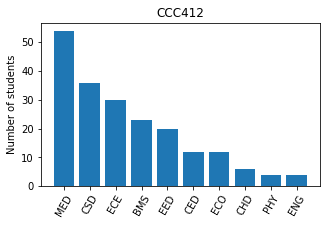

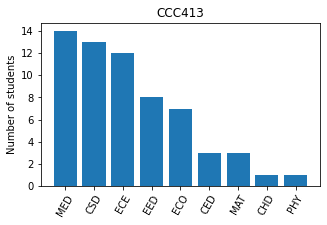

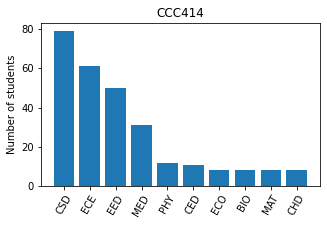

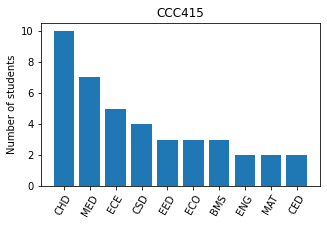

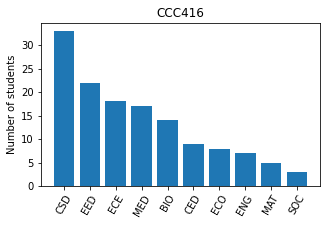

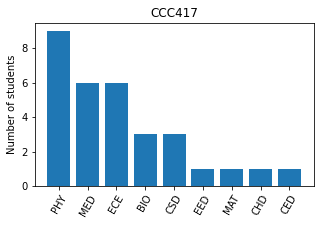

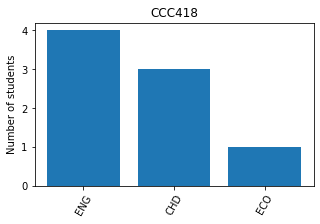

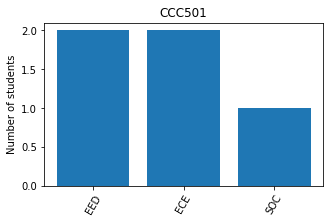

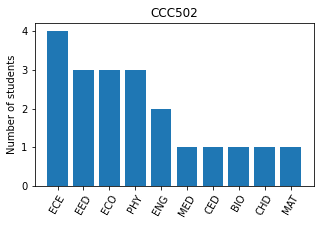

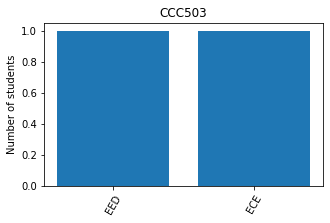

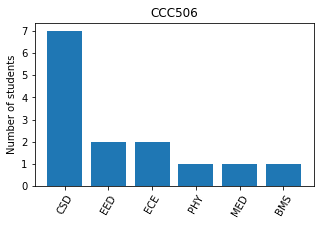

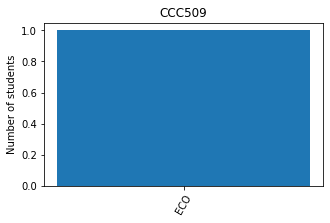

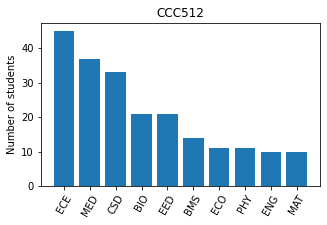

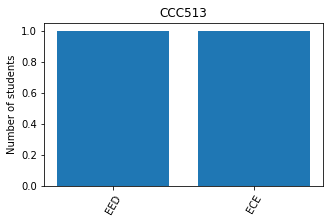

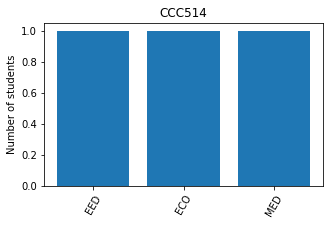

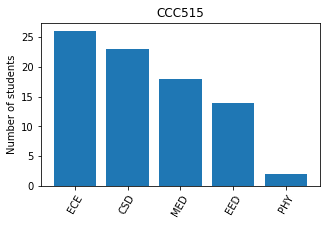

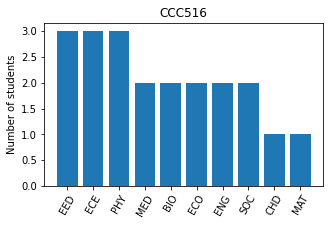

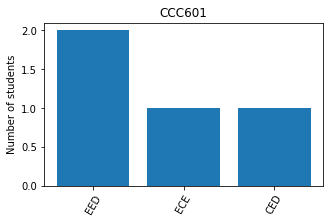

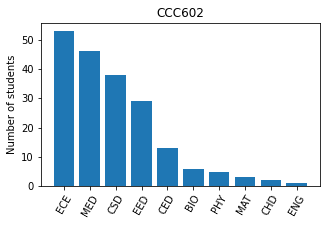

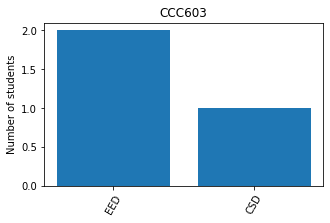

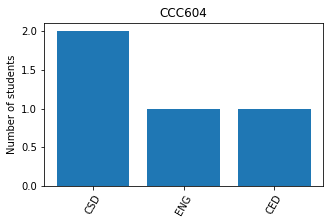

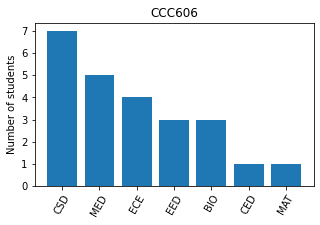

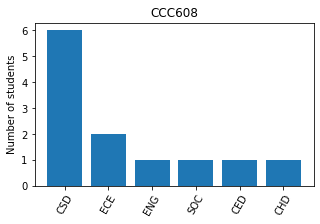

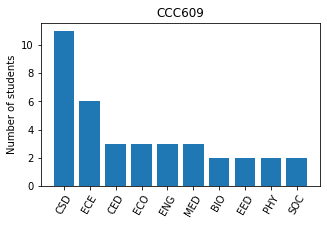

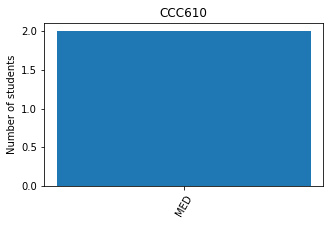

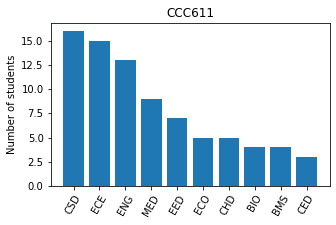

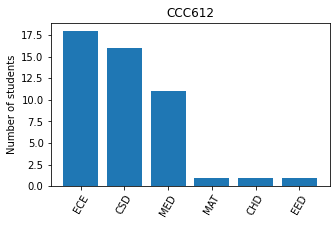

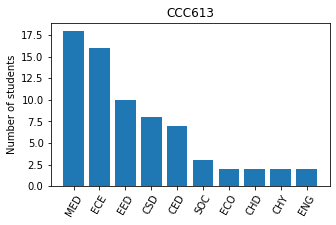

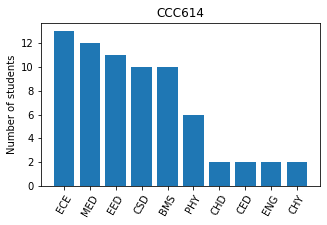

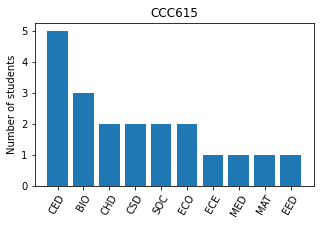

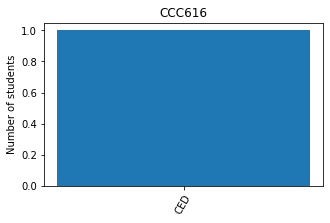

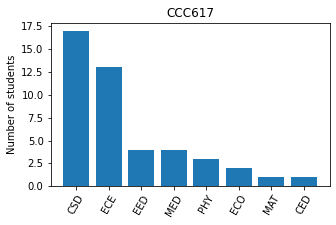

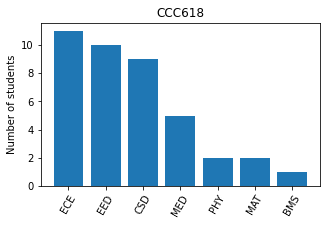

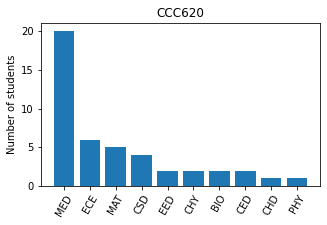

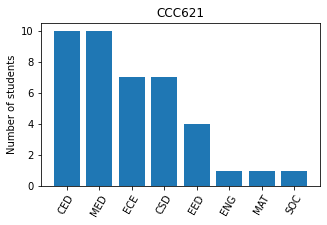

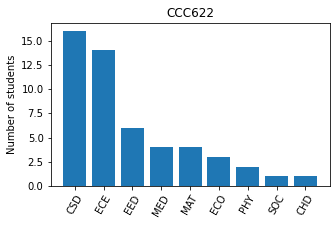

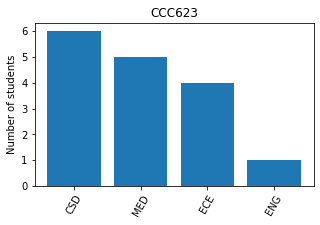

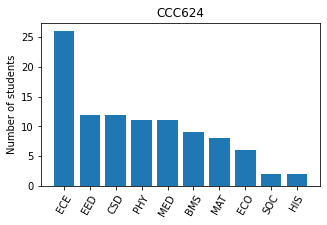

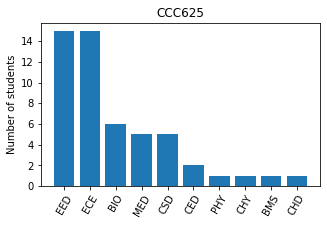

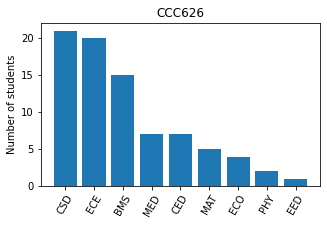

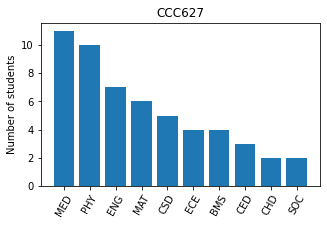

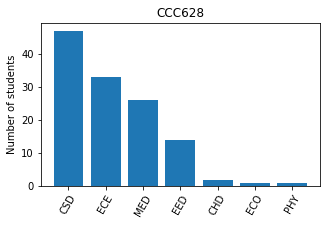

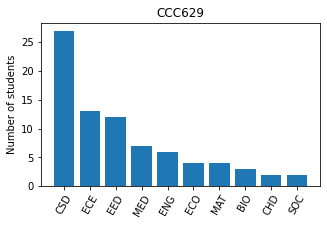

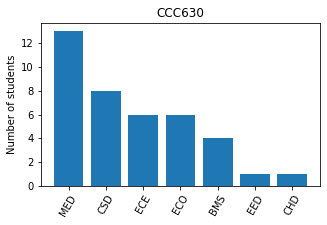

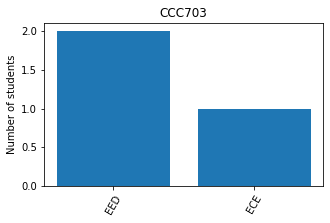

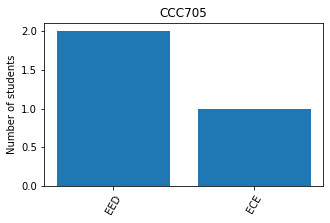

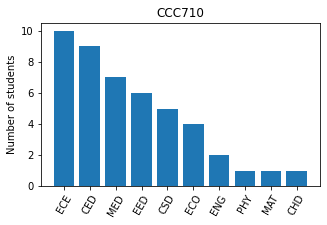

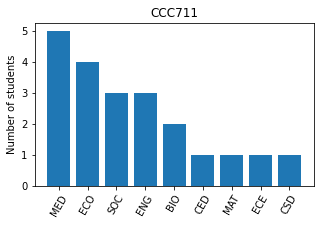

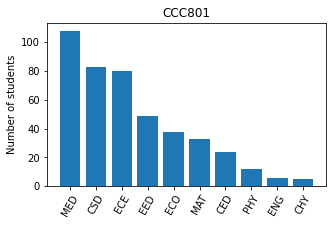

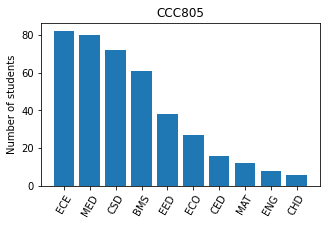

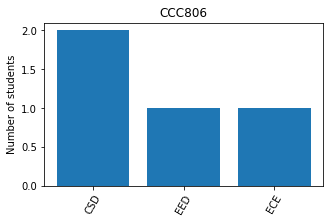

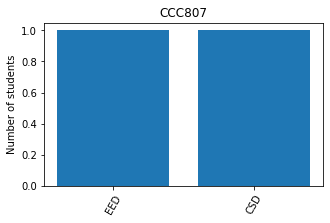

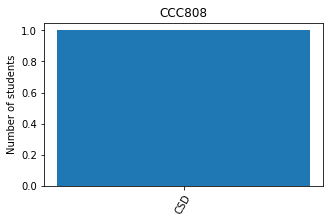

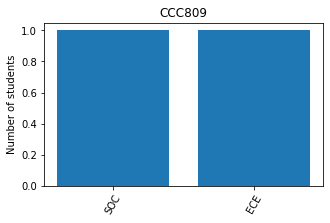

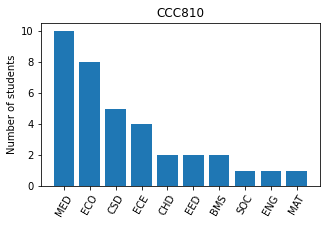

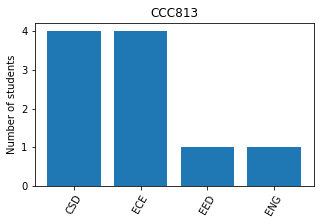

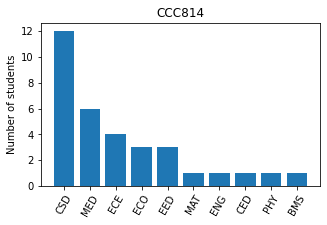

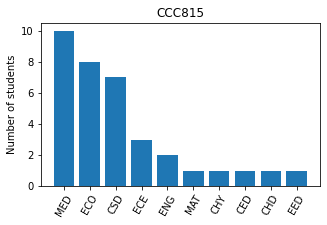

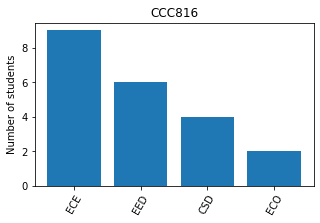

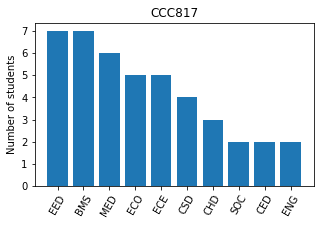

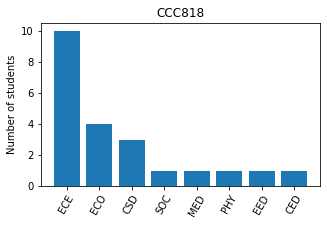

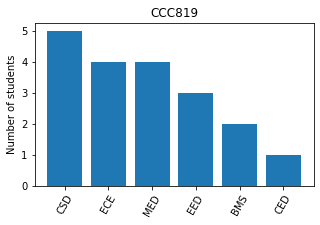

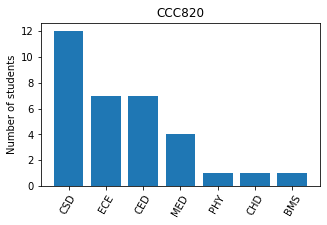

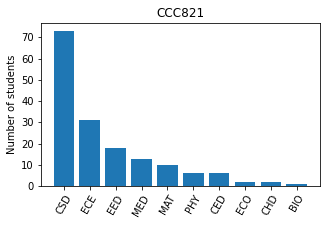

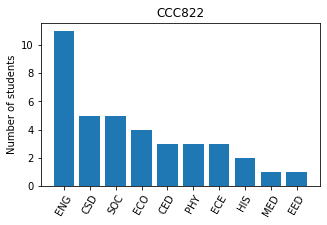

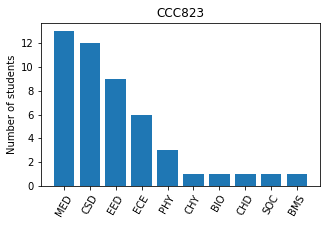

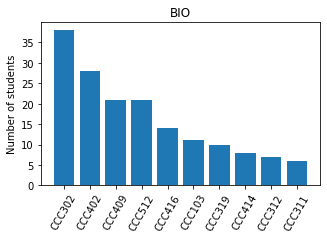

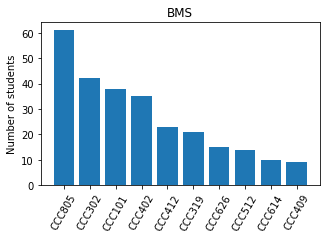

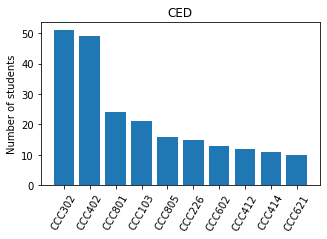

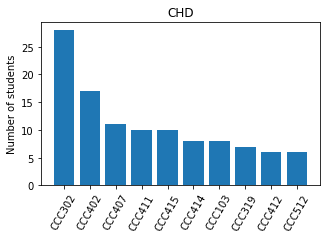

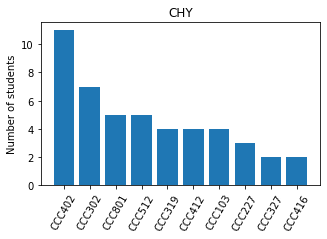

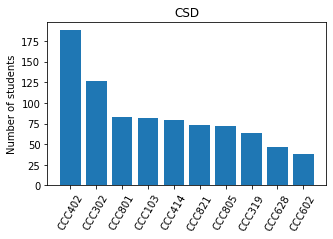

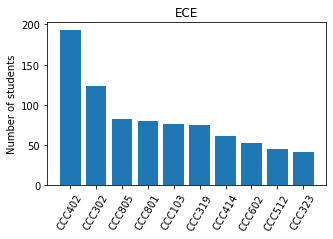

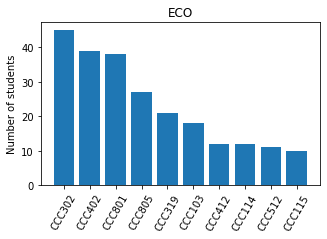

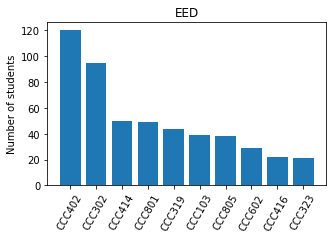

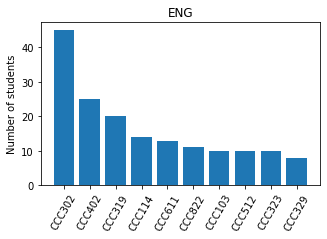

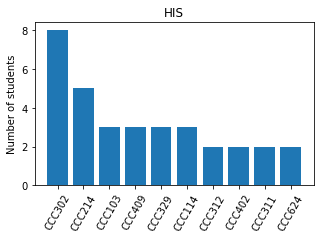

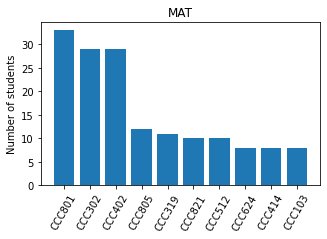

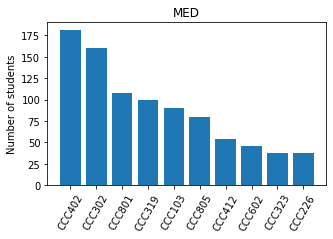

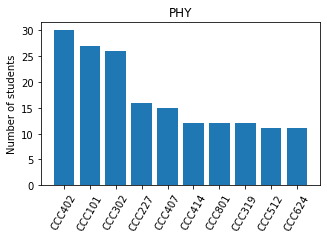

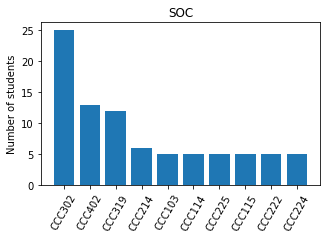

<Figure size 360x216 with 0 Axes>

In [9]:
#read the ccc data 
df_ccc=pd.read_csv('../data/preprocessed/Final_ccc.csv')

#count the number of unique ccc
df_ccc['Course'].nunique()

#display the names of unique ccc
df_ccc['Grade'].unique()

#drop the unnecessary cols
df_ccc.drop(['Unnamed: 0'],inplace=True,axis=1)
df_ccc.drop(['Sem_year'],inplace=True,axis=1)

#drop EVS and CCD ccc as they are compulsory
for i,row in df_ccc.iterrows():
    if row['Course']=='CCC704' or row['Course']=='CCC510':
        df_ccc.drop(i,inplace=True)

#group the ccc by ccc name
course_grades=df_ccc.groupby('Course')['Grade'].apply(list).to_dict()

#make a dataframe out of the list of values
ccc_grades=pd.DataFrame(list(course_grades.items()))
#rename the columns in the dataframe
ccc_grades=ccc_grades.rename( columns={0: "Course", 1: "Grade"})

#make new empty columns in the dataframe
ccc_grades['grades_dict']=""
ccc_grades['5_largest']=''
ccc_grades['total_students']=''
ccc_grades['avg_grade']=''


#count the occurrence of each grade  
for i,row in ccc_grades.iterrows():
    ccc_grades.loc[i][2]=collections.Counter(ccc_grades.loc[i][1])
    
#top 5 ccc wrt grades
for i,row in ccc_grades.iterrows():
    ccc_grades.loc[i][3]=f(collections.Counter(ccc_grades.loc[i][2]).most_common(5))
    

length_course_grades = {key: len(value) for key, value in course_grades.items()}
total_student_list=list(length_course_grades.values())

#total number of students in the list
ccc_grades['total_students']=total_student_list

for i,row in ccc_grades.iterrows():
    if row['total_students']<=5:
        ccc_grades.drop(i,inplace=True)

# function that plots grades summary of a particular CCC        
def grade_frequency(course):
    plt.ylabel('frequency')
    plt.title(course+' grades frequency')
    plt.xticks(range(len(ccc_grades[ccc_grades["Course"]==course].iloc[0]['5_largest'])), list(ccc_grades[ccc_grades["Course"]==course].iloc[0]['5_largest'].keys()),rotation=60)
    plt.bar(range(len(ccc_grades[ccc_grades["Course"]==course].iloc[0]['5_largest'])), list(ccc_grades[ccc_grades["Course"]==course].iloc[0]['5_largest'].values()), align='center',color='red')
    
    plt.figure(figsize=(5, 3))
    
# function to select a course for which you want to see the grade distribution
grade_frequency('CCC101')

        
        
avgGradesList = []
for i,row in ccc_grades.iterrows():
    avgGradesList.append(avgGrade(ccc_grades.loc[i]["5_largest"]))

#appending the avgGrades as columns
ccc_grades["avg_grade"] = avgGradesList

#courses in the band gap
# print('9-10')
AminustoA=[]
for i,row in ccc_grades.iterrows():
    if row['avg_grade']>=9:
        # print(row['Course'])
        AminustoA.append(row['Course'])
# print('8-9')        
BtoAminus=[]
for i,row in ccc_grades.iterrows():
    if row['avg_grade']>=8 and row['avg_grade']<9:
        # print(row['Course'])
        BtoAminus.append(row['Course'])
# print('7-8')  
BminustoB=[]      
for i,row in ccc_grades.iterrows():
    if row['avg_grade']>=7 and row['avg_grade']<8:
        # print(row['Course'])
        BminustoB.append(row['Course'])
# print('6-7')        
CtoBminus=[]
for i,row in ccc_grades.iterrows():
    if row['avg_grade']>=6 and row['avg_grade']<7:
        # print(row['Course'])
        CtoBminus.append(row['Course'])
# print('<6')     
Below_C=[]   
for i,row in ccc_grades.iterrows():
    if row['avg_grade']<6:
        # print(row['Course'])
        Below_C.append(row['Course'])
        
grade_brackets_dict={'A-_to_A':3,'B_to_A-':50,'B-_to_B':26,'C_to_B-':7,'Below_C':5}

#code to plot the graph
plt.ylabel('No. of students')
plt.title('Overall CCC Grade Frequency')
plt.bar(range(len(grade_brackets_dict)), list(grade_brackets_dict.values()), align='center')
plt.xticks(range(len(grade_brackets_dict)), list(grade_brackets_dict.keys()),rotation=60)
plt.figure(figsize=(5, 3))


#--------------------------------------------------------------------------------------------------------------------
#DEPT WISE ANALYSIS
#group the data acc to the major name of the ccc
course_dept=df_ccc.groupby('Course')['Major'].apply(list).to_dict()
ccc_dept=pd.DataFrame(list(course_dept.items()))
ccc_dept=ccc_dept.rename( columns={0: "Major", 1: "Course"})
ccc_dept['dept_dict']=''
ccc_dept['10_largest']=''

for i,row in ccc_dept.iterrows():
    ccc_dept.loc[i][2]=collections.Counter(ccc_dept.loc[i][1])
    
   
    
for i,row in ccc_dept.iterrows():
    ccc_dept.loc[i][3]=f(collections.Counter(ccc_dept.loc[i][2]).most_common(10))


#dept wise analysis of ccc's 
for i,row in ccc_dept.iterrows():
    plt.ylabel('Number of students')
    plt.title(ccc_dept['Major'].iloc[i])
    plt.bar(range(len(ccc_dept['10_largest'].iloc[i])), list(ccc_dept['10_largest'].iloc[i].values()), align='center')
    plt.xticks(range(len(ccc_dept['10_largest'].iloc[i])), list(ccc_dept['10_largest'].iloc[i].keys()),rotation=60)
    plt.figure(figsize=(5, 3))


course_dept2=df_ccc.groupby('Major')['Course'].apply(list).to_dict()
ccc_dept2=pd.DataFrame(list(course_dept2.items()))
ccc_dept2=ccc_dept2.rename( columns={0: "Major", 1: "Course"})
ccc_dept2['dept_dict']=''
ccc_dept2['10_largest']=''

for i,row in ccc_dept2.iterrows():
    ccc_dept2.loc[i][2]=collections.Counter(ccc_dept2.loc[i][1])
    
   
    
for i,row in ccc_dept2.iterrows():
    ccc_dept2.loc[i][3]=f(collections.Counter(ccc_dept2.loc[i][2]).most_common(10))


#dept wise analysis of ccc's 
for i,row in ccc_dept2.iterrows():
    plt.ylabel('Number of students')
    plt.title(ccc_dept2['Major'].iloc[i])
    plt.bar(range(len(ccc_dept2['10_largest'].iloc[i])), list(ccc_dept2['10_largest'].iloc[i].values()), align='center')
    plt.xticks(range(len(ccc_dept2['10_largest'].iloc[i])), list(ccc_dept2['10_largest'].iloc[i].keys()),rotation=60)
    plt.figure(figsize=(5, 3))

# CONCLUSION:
- We have written a function `grade_frequency()` that returns the summary of grades obtained in that particular CCC course. It will help students know what kind of grades they can expect in the CCC they wish to opt for and may aid them in deciding for or against opting it
- We did not plot the graph for every course's grades to reduce the number of plots, but it can be found out for any CCC course
- We have found out students from what Major background prefer what kind of CCCs, like we can observe from here that `CCC816` which is a course in `Analysis and Modelling using Excel` is mostly chosen by students belonging to Major of `Economics`, `Computer Science`, `Electrical Engineering`, similarly other patterns can be mined from these results.
- We have also determined from a particular Major background, what kind of CCC's students opt for, which can help us understand the interest level of the student, relationship between the Major background and the CCC department, similarity between the domains, etc